# Regresión lineal - Predecir el costo de un vehículo

El siguiente dataset se basa en el grupo de automoviles marca BMW.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [2]:
dataframe = pd.read_csv('../data/bmw.csv')

## Exploring the data

Con el método `.head()` podemos observar los cinco primeras entradas.

In [3]:
dataframe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Con el método `.shape()` podemos observar las dimensiones del dataframe.

In [4]:
dataframe.shape

(10781, 9)

Con la extensión is `isnull().sum()` podemos observar los valores nulos.

In [5]:
dataframe.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Con el atributo `.dtypes` podemos ver el tipo de dato de las variables.

In [6]:
dataframe.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

Podemos usar el método `.value_counts()` para cuantas veces se repite el tipo de dato. Además, en este caso se está accediendo a una sola columna 'transmission'.

In [7]:
dataframe['transmission'].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [8]:
dataframe['fuelType'].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

In [9]:
dataframe['model'].value_counts()

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

## Visualizing Data

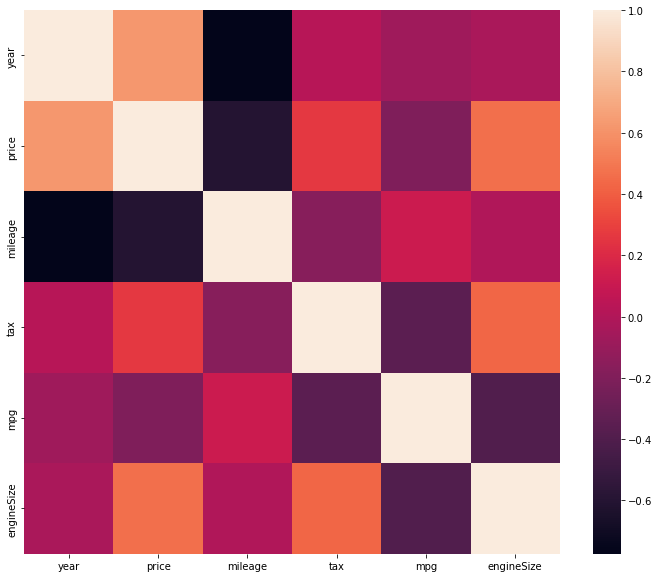

In [10]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(dataframe.corr())

C:\Users\PC\.conda\envs\IA\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


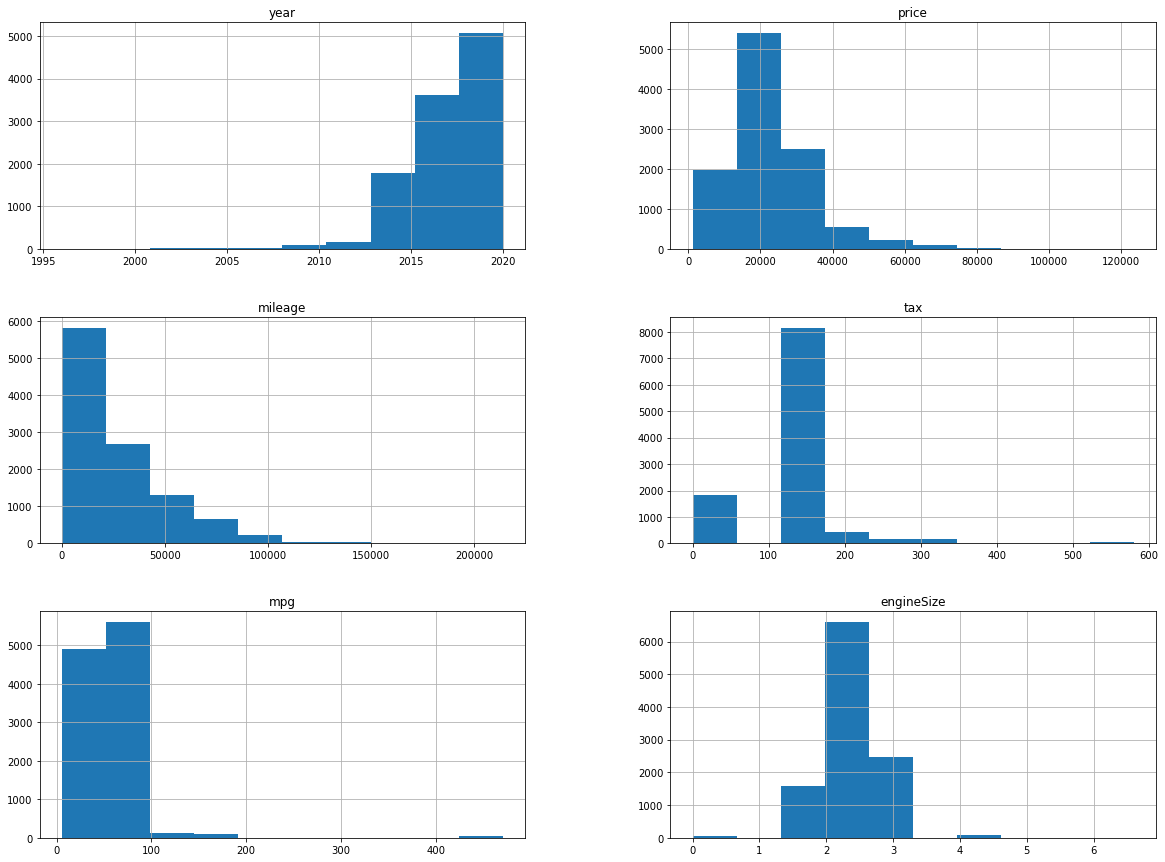

In [11]:
fig = plt.figure(figsize=(20, 15))
ax = fig.gca()
dataframe.hist(ax=ax)
plt.show()

## One hot encoding

In [12]:
dataframe.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [13]:
dataframe = dataframe[['price', 'year', 'model', 'transmission']]

In [14]:
dataframe = pd.get_dummies(data=dataframe, columns=['model', 'transmission'])

In [15]:
dataframe.shape

(10781, 29)

## Split the data

In [16]:
data = dataframe.drop('price', axis=1)
label = dataframe['price']

In [17]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset, train_label, test_label = train_test_split(data, label, test_size=0.33) 

## Modelo One --> Ridge

In [18]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Ridge

In [19]:
model_1 = Ridge(alpha=1.0)
model_1.fit(train_dataset, train_label)

Ridge()

In [20]:
model_1.score(test_dataset, test_label)

0.8093345758096093

In [21]:
prediction = model_1.predict(test_dataset)
np.sqrt(MSE(test_label, prediction))

4920.897377625879

# Modelo Two --> Xgboost

In [22]:
import xgboost as xg

In [23]:
model_2 = xg.XGBRegressor(objective = 'reg:linear', n_estimators=10, seed=123)
model_2.fit(train_dataset, train_label)

[11:18:06] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
model_2.score(test_dataset, test_label)

0.8499202985878077

In [25]:
prediction = model_2.predict(test_dataset)
np.sqrt(MSE(test_label, prediction))

4365.855070126473

### Datos de prueba con el siguiente modelo para el programa python

In [26]:
train_dataset.columns

Index(['year', 'model_ 1 Series', 'model_ 2 Series', 'model_ 3 Series',
       'model_ 4 Series', 'model_ 5 Series', 'model_ 6 Series',
       'model_ 7 Series', 'model_ 8 Series', 'model_ M2', 'model_ M3',
       'model_ M4', 'model_ M5', 'model_ M6', 'model_ X1', 'model_ X2',
       'model_ X3', 'model_ X4', 'model_ X5', 'model_ X6', 'model_ X7',
       'model_ Z3', 'model_ Z4', 'model_ i3', 'model_ i8',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto'],
      dtype='object')

In [27]:
train_dataset.head()

,year,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ M2,...,model_ X5,model_ X6,model_ X7,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
529,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1345,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
993,2017,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7157,2016,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6017,2017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
train_label.head(5)

529      7998
1345    31276
993     17498
7157    17995
6017    21790
Name: price, dtype: int64

In [43]:
user_input = pd.DataFrame(data = {'year':0, 'model_ 1 Series':0, 'model_ 2 Series':0, 'model_ 3 Series':0,
       'model_ 4 Series':0, 'model_ 5 Series':0, 'model_ 6 Series':0,
       'model_ 7 Series':0, 'model_ 8 Series':0, 'model_ M2':0, 'model_ M3':0,
       'model_ M4':0, 'model_ M5':0, 'model_ M6':0, 'model_ X1':0, 'model_ X2':0,
       'model_ X3':0, 'model_ X4':0, 'model_ X5':0, 'model_ X6':0, 'model_ X7':0,
       'model_ Z3':0, 'model_ Z4':0, 'model_ i3':0, 'model_ i8':0,
       'transmission_Automatic':0, 'transmission_Manual':0,
       'transmission_Semi-Auto':0}, index=[0])

In [44]:
year = 2017
transmission = 'transmission_Semi-Auto'
model = 'model_ 5 Series'

user_input['year'] = year
user_input[transmission] = 1
user_input[model] = 1

user_input

,year,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ M2,...,model_ X5,model_ X6,model_ X7,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,2017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
prediction = model_2.predict(user_input)
print(prediction)

[21092.023]


## Modelo Three --> ElasticNet

In [32]:
from sklearn.linear_model import ElasticNet
model_3 = ElasticNet(random_state=0)
model_3.fit(train_dataset, train_label)

ElasticNet(random_state=0)

In [33]:
prediction = model_3.predict(test_dataset)
np.sqrt(MSE(test_label, prediction))

8174.355719731421

## Modelo Four --> Neural Network (N.N.)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [36]:
model_4 = Sequential()

model_4.add(Dense(38, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(1))

model_4.compile(optimizer='adam', loss='mse')

In [37]:
model_4.fit(x=train_dataset, y=train_label, epochs=600, validation_data=(test_dataset, test_label), callbacks=[early_stop])

Epoch 1/600
226/226 [==============================] - 1s 3ms/step - loss: 603904896.0000 - val_loss: 521963840.0000
Epoch 2/600
226/226 [==============================] - 1s 2ms/step - loss: 431874720.0000 - val_loss: 312269056.0000
Epoch 3/600
226/226 [==============================] - 1s 2ms/step - loss: 249022512.0000 - val_loss: 165618400.0000
Epoch 4/600
226/226 [==============================] - 1s 2ms/step - loss: 182819696.0000 - val_loss: 133586784.0000
Epoch 5/600
226/226 [==============================] - 1s 2ms/step - loss: 171775008.0000 - val_loss: 129554296.0000
Epoch 6/600
226/226 [==============================] - 1s 2ms/step - loss: 169817248.0000 - val_loss: 128778464.0000
Epoch 7/600
226/226 [==============================] - 1s 2ms/step - loss: 172095264.0000 - val_loss: 129122920.0000
Epoch 8/600
226/226 [==============================] - 1s 2ms/step - loss: 173073216.0000 - val_loss: 128896664.0000
Epoch 9/600
226/226 [==============================] - 1s 2ms/st

226/226 [==============================] - 0s 2ms/step - loss: 168780320.0000 - val_loss: 127897928.0000
Epoch 71/600
226/226 [==============================] - 0s 2ms/step - loss: 171424784.0000 - val_loss: 127892392.0000
Epoch 72/600
226/226 [==============================] - 0s 2ms/step - loss: 168613232.0000 - val_loss: 128293288.0000
Epoch 73/600
226/226 [==============================] - 0s 2ms/step - loss: 166511328.0000 - val_loss: 127880832.0000
Epoch 74/600
226/226 [==============================] - 0s 2ms/step - loss: 171003088.0000 - val_loss: 127961824.0000
Epoch 75/600
226/226 [==============================] - 0s 2ms/step - loss: 170390448.0000 - val_loss: 127546760.0000
Epoch 76/600
226/226 [==============================] - 0s 2ms/step - loss: 170701056.0000 - val_loss: 128213128.0000
Epoch 77/600
226/226 [==============================] - 0s 2ms/step - loss: 166824096.0000 - val_loss: 127731992.0000
Epoch 78/600
226/226 [==============================] - 0s 2ms/step -

226/226 [==============================] - 0s 2ms/step - loss: 167269968.0000 - val_loss: 125397728.0000
Epoch 140/600
226/226 [==============================] - 0s 2ms/step - loss: 165681504.0000 - val_loss: 124703272.0000
Epoch 141/600
226/226 [==============================] - 0s 2ms/step - loss: 167062064.0000 - val_loss: 125022264.0000
Epoch 142/600
226/226 [==============================] - 0s 2ms/step - loss: 167979472.0000 - val_loss: 125171264.0000
Epoch 143/600
226/226 [==============================] - 0s 2ms/step - loss: 165436656.0000 - val_loss: 124565192.0000
Epoch 144/600
226/226 [==============================] - 0s 2ms/step - loss: 166732704.0000 - val_loss: 123843224.0000
Epoch 145/600
226/226 [==============================] - 0s 2ms/step - loss: 168689888.0000 - val_loss: 124189944.0000
Epoch 146/600
226/226 [==============================] - 0s 2ms/step - loss: 167836416.0000 - val_loss: 124952328.0000
Epoch 147/600
226/226 [==============================] - 0s 2m

Epoch 208/600
226/226 [==============================] - 0s 2ms/step - loss: 162405472.0000 - val_loss: 120552880.0000
Epoch 209/600
226/226 [==============================] - 0s 2ms/step - loss: 160721856.0000 - val_loss: 120381448.0000
Epoch 210/600
226/226 [==============================] - 0s 2ms/step - loss: 160392208.0000 - val_loss: 120176928.0000
Epoch 211/600
226/226 [==============================] - 1s 2ms/step - loss: 159299104.0000 - val_loss: 120538552.0000
Epoch 212/600
226/226 [==============================] - 1s 2ms/step - loss: 163114944.0000 - val_loss: 120341824.0000
Epoch 213/600
226/226 [==============================] - 1s 2ms/step - loss: 160088928.0000 - val_loss: 120581752.0000
Epoch 214/600
226/226 [==============================] - 1s 2ms/step - loss: 160839504.0000 - val_loss: 119780976.0000
Epoch 215/600
226/226 [==============================] - 1s 2ms/step - loss: 162829184.0000 - val_loss: 122464928.0000
Epoch 216/600
226/226 [=========================

Epoch 277/600
226/226 [==============================] - 0s 2ms/step - loss: 152678816.0000 - val_loss: 112253768.0000
Epoch 278/600
226/226 [==============================] - 0s 2ms/step - loss: 153205120.0000 - val_loss: 111129448.0000
Epoch 279/600
226/226 [==============================] - 0s 2ms/step - loss: 151871648.0000 - val_loss: 109702440.0000
Epoch 280/600
226/226 [==============================] - 0s 2ms/step - loss: 152110400.0000 - val_loss: 109995328.0000
Epoch 281/600
226/226 [==============================] - 0s 2ms/step - loss: 146985856.0000 - val_loss: 110392760.0000
Epoch 282/600
226/226 [==============================] - 0s 2ms/step - loss: 152831136.0000 - val_loss: 109464056.0000
Epoch 283/600
226/226 [==============================] - 0s 1ms/step - loss: 151225216.0000 - val_loss: 110941544.0000
Epoch 284/600
226/226 [==============================] - 0s 2ms/step - loss: 151759712.0000 - val_loss: 110118104.0000
Epoch 285/600
226/226 [=========================

Epoch 346/600
226/226 [==============================] - 0s 2ms/step - loss: 138097440.0000 - val_loss: 97658000.0000
Epoch 347/600
226/226 [==============================] - 0s 2ms/step - loss: 135774208.0000 - val_loss: 98120040.0000
Epoch 348/600
226/226 [==============================] - 0s 2ms/step - loss: 136593440.0000 - val_loss: 97064352.0000
Epoch 349/600
226/226 [==============================] - 0s 2ms/step - loss: 135191408.0000 - val_loss: 94306016.0000
Epoch 350/600
226/226 [==============================] - 0s 2ms/step - loss: 136317248.0000 - val_loss: 98624000.0000
Epoch 351/600
226/226 [==============================] - 0s 2ms/step - loss: 136698768.0000 - val_loss: 97157648.0000
Epoch 352/600
226/226 [==============================] - 0s 2ms/step - loss: 138043552.0000 - val_loss: 94952504.0000
Epoch 353/600
226/226 [==============================] - 0s 2ms/step - loss: 140093280.0000 - val_loss: 95686936.0000
Epoch 354/600
226/226 [==============================] -

226/226 [==============================] - 0s 2ms/step - loss: 127280760.0000 - val_loss: 88258128.0000
Epoch 416/600
226/226 [==============================] - 0s 2ms/step - loss: 129240376.0000 - val_loss: 89061248.0000
Epoch 417/600
226/226 [==============================] - 1s 2ms/step - loss: 128646648.0000 - val_loss: 85795592.0000
Epoch 418/600
226/226 [==============================] - 0s 2ms/step - loss: 128489424.0000 - val_loss: 87820272.0000
Epoch 419/600
226/226 [==============================] - 0s 2ms/step - loss: 128862944.0000 - val_loss: 87090808.0000
Epoch 420/600
226/226 [==============================] - 1s 2ms/step - loss: 127384264.0000 - val_loss: 86619280.0000
Epoch 421/600
226/226 [==============================] - 1s 2ms/step - loss: 127578616.0000 - val_loss: 90662616.0000
Epoch 422/600
226/226 [==============================] - 1s 2ms/step - loss: 127601776.0000 - val_loss: 88547952.0000
Epoch 423/600
226/226 [==============================] - 1s 2ms/step -

226/226 [==============================] - 1s 2ms/step - loss: 121798192.0000 - val_loss: 82492936.0000
Epoch 485/600
226/226 [==============================] - 1s 2ms/step - loss: 123456552.0000 - val_loss: 85903784.0000
Epoch 486/600
226/226 [==============================] - 1s 2ms/step - loss: 122648576.0000 - val_loss: 82089248.0000
Epoch 487/600
226/226 [==============================] - 1s 2ms/step - loss: 123324088.0000 - val_loss: 86720560.0000
Epoch 488/600
226/226 [==============================] - 1s 2ms/step - loss: 124672720.0000 - val_loss: 84137064.0000
Epoch 489/600
226/226 [==============================] - 1s 2ms/step - loss: 125336072.0000 - val_loss: 84356584.0000
Epoch 490/600
226/226 [==============================] - 1s 2ms/step - loss: 123041488.0000 - val_loss: 82185680.0000
Epoch 491/600
226/226 [==============================] - 1s 2ms/step - loss: 125183360.0000 - val_loss: 81378192.0000
Epoch 492/600
226/226 [==============================] - 1s 2ms/step -

<AxesSubplot:>

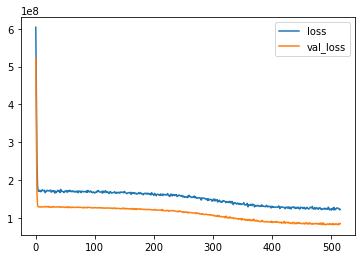

In [38]:
losses = pd.DataFrame(model_4.history.history)
losses.plot()

In [39]:
prediction = model_4.predict(test_dataset)
np.sqrt(MSE(test_label, prediction))

9199.809846634344